In [16]:
import sys

matfile = '/mnt/matsubara/rawdata/solid_liquid_s.mat'

# Try scipy.io.loadmat
try:
    from scipy.io import loadmat
    data = loadmat(matfile)
    print("Loaded with scipy.io.loadmat (v7 or earlier).")
    print("Top-level keys:")
    for key in data:
        print(f"  {key}: {type(data[key])}, shape={getattr(data[key], 'shape', None)}")
    sys.exit(0)
except Exception as e:
    print("scipy.io.loadmat failed:", e)

# Try h5py
try:
    import h5py
    with h5py.File(matfile, 'r') as f:
        print("Loaded with h5py (v7.3 HDF5 format).")
        def print_h5_structure(g, indent=0):
            for key in g:
                item = g[key]
                if isinstance(item, h5py.Group):
                    print('  ' * indent + f"{key}/ (Group)")
                    print_h5_structure(item, indent+1)
                else:
                    print('  ' * indent + f"{key}: {item.shape}, dtype={item.dtype}")
        print_h5_structure(f)
except Exception as e:
    print("h5py failed:", e)

scipy.io.loadmat failed: Please use HDF reader for matlab v7.3 files, e.g. h5py
Loaded with h5py (v7.3 HDF5 format).
#refs#/ (Group)
  a: (2,), dtype=uint64
  b: (1, 584), dtype=uint8
  c: (1, 1), dtype=float64
  d: (1, 1), dtype=float64
  e: (1, 1), dtype=float64
  f: (1, 1), dtype=float64
  g: (1, 1), dtype=float64
  h: (1, 1), dtype=float64
  i: (1, 2008), dtype=float64
  j: (1, 748), dtype=float64
  k: (1, 108), dtype=float64
  l: (108, 748, 2008), dtype=float64
  m: (1, 1), dtype=float64
  n: (1, 1), dtype=float64
  o: (1, 1), dtype=float64
  p: (1, 1), dtype=float64
  q: (1, 1), dtype=float64
  r: (1, 1), dtype=float64
  s: (1, 1), dtype=float64
  t: (1, 2), dtype=object
  u: (2,), dtype=uint64
  v: (2,), dtype=uint64
  w: (1, 2), dtype=int32
  x: (1, 2), dtype=object
  y: (2,), dtype=uint64
  z/ (Group)
    Nt: (4, 1), dtype=uint16
    Nx: (1, 1), dtype=float64
    Ny: (1, 1), dtype=float64
    Nz: (1, 1), dtype=float64
    dim: (1, 1), dtype=float64
    dt: (4, 1), dtype=uint16

sensor_data shape: (150001, 32)
kgrid shape: (1, 6)
kgrid: [[3707764736          2          1          1          1          1]]


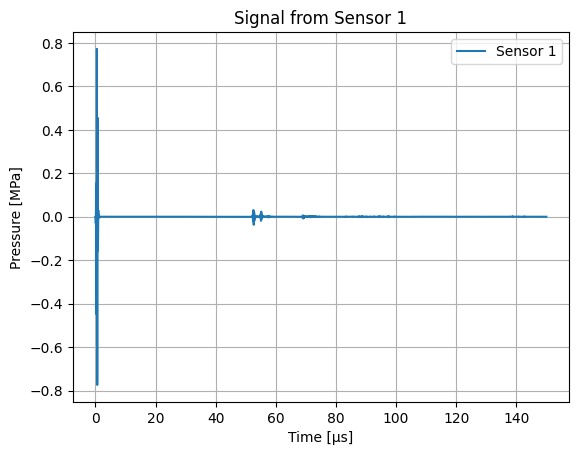

In [17]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

matfile = '/mnt/matsubara/rawdata/solid_liquid_s.mat'

with h5py.File(matfile, 'r') as f:
    # sensor_dataの取得
    sensor_data = np.array(f['sensor_data'])  # shape: (10001, 32)
    print('sensor_data shape:', sensor_data.shape)
    
    # kgridの取得（内容によってはt_arrayが含まれている場合もある）
    if 'kgrid' in f:
        kgrid = np.array(f['kgrid'])
        print('kgrid shape:', kgrid.shape)
        print('kgrid:', kgrid)
    else:
        kgrid = None

# 仮の時間軸を作成（例: 10001点, サンプリング間隔dt=1.0e-8秒と仮定）
dt = 1.0e-9  # 例: 10ns（適切な値に変更してください）
t_array = np.arange(sensor_data.shape[0]) * dt

# 1ch目の信号をプロット
plt.figure()
plt.plot(t_array * 1e6, sensor_data[:, 16] * 1e-6, label='Sensor 1')
plt.xlabel('Time [μs]')
plt.ylabel('Pressure [MPa]')
plt.title('Signal from Sensor 1')
plt.grid(True)
plt.legend()
plt.show()